# Seaborn Intro

In [1]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df ['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Import and Install Seaborn

In [2]:
import seaborn as sns

In [3]:
# Only get Data Analysts Jobs in the UK
df_DA_UK = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

# Drop NaN values from the 'salary_year_avg'column for accurate visualisation
df_DA_UK = df_DA_UK.dropna(subset=['salary_year_avg'])

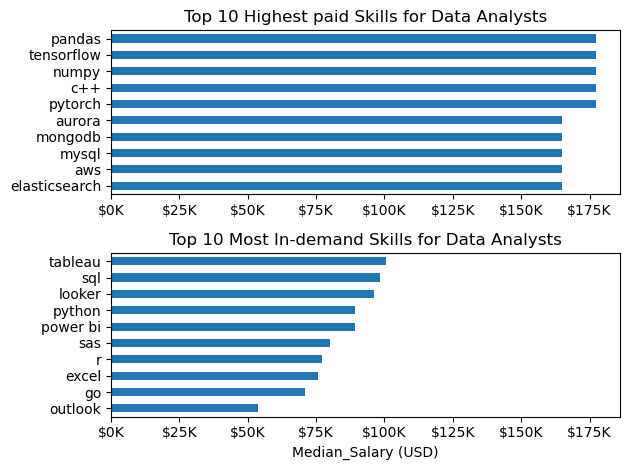

In [4]:
df_DA_UK = df_DA_UK.explode('job_skills')


df_DA_top_pay = df_DA_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_skills = df_DA_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by= 'count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)


fig, ax = plt.subplots(2, 1)

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Top 10 Highest paid Skills for Data Analysts')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))

# Top 10 most In-demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlabel('Median_Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_title('Top 10 Most In-demand Skills for Data Analysts')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))


fig.tight_layout()
plt.show()

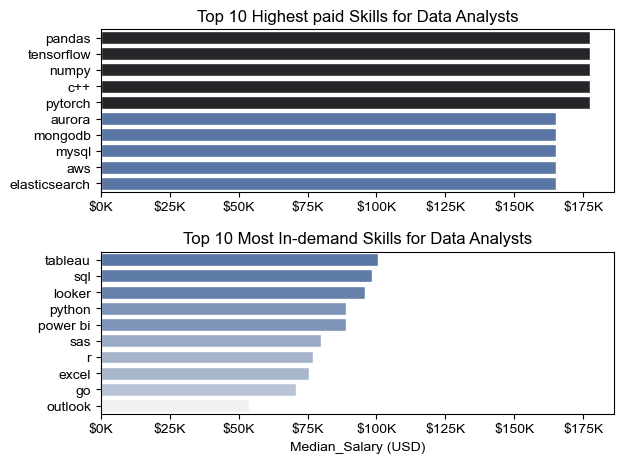

In [5]:
# Using Seaborn for the same plots

fig, ax = plt.subplots(2, 1)
sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Top 10 Highest paid Skills for Data Analysts')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))

# Top 10 most In-demand Skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlabel('Median_Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_title('Top 10 Most In-demand Skills for Data Analysts')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))


fig.tight_layout()
plt.show()

# Histogram

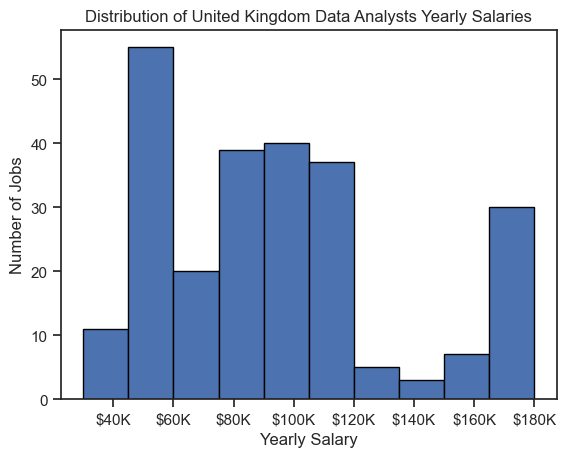

In [6]:
df_DA_UK['salary_year_avg'].plot(kind='hist', bins=10, edgecolor='black')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of United Kingdom Data Analysts Yearly Salaries')

plt.show()

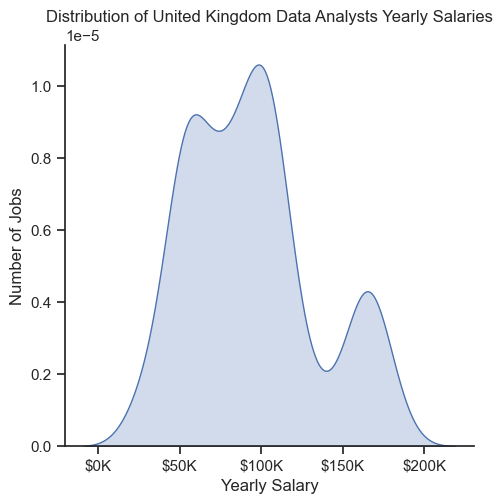

In [7]:
sns.displot(df_DA_UK['salary_year_avg'], kind='kde', fill=True)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of United Kingdom Data Analysts Yearly Salaries')

plt.show()

# Boxplots

C:\Users\User\AppData\Local\Temp\ipykernel_8144\2886435246.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


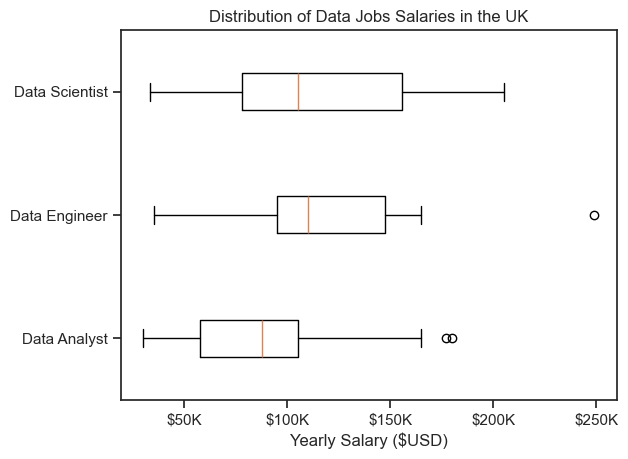

In [8]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Filter the Data to appropriate Job Titles
df_UK = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United Kingdom')].copy()

df_UK = df_UK.dropna(subset=['salary_year_avg'])

job_list = [df_UK[df_UK['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.xlabel('Yearly Salary ($USD)')
plt.title('Distribution of Data Jobs Salaries in the UK')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))

plt.show()

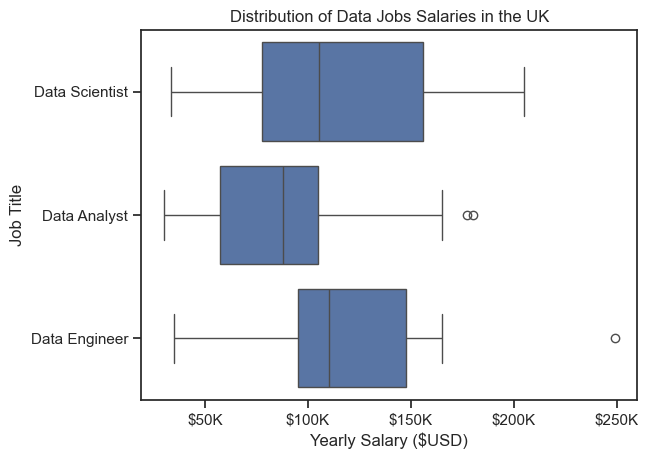

In [9]:
sns.boxplot(data=df_UK, x='salary_year_avg', y='job_title_short')

plt.title('Distribution of Data Jobs Salaries in the UK')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Job Title')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))

plt.show()